## **Setting up Data**

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract data
df_main = pd.read_csv('https://raw.githubusercontent.com/feliceelena/DataSets/main/clean_data_after_eda.csv')
df_price = pd.read_csv('https://raw.githubusercontent.com/feliceelena/DataSets/main/price_data.csv')

# Convert datetime
date = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for i in date:
  df_main[i] = pd.to_datetime(df_main[i], format='%Y-%m-%d')
df_price['price_date'] = pd.to_datetime(df_price['price_date'], format='%Y-%m-%d')

## **Difference between off-peak prices in January and December**

In [ ]:
# Calculate off_peak price in december and january
monthly_price_by_id = df_price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean',
                                                                  'price_off_peak_fix': 'mean'}).reset_index()
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Rename columns
jan_prices = jan_prices.rename(columns={"price_off_peak_var": "price_off_peak_var_jan",
                                  "price_off_peak_fix": "price_off_peak_fix_jan"})
dec_prices = dec_prices.rename(columns={"price_off_peak_var": "price_off_peak_var_dec",
                                  "price_off_peak_fix": "price_off_peak_fix_dec"})

# Merge dataset
diff = pd.merge(jan_prices.drop(columns = 'price_date'),
                dec_prices.drop(columns = 'price_date'), on ='id')

# Calculate differences
diff['offpeak_diff_decJan_energy'] = diff['price_off_peak_var_dec'] - diff['price_off_peak_var_jan']
diff['offpeak_diff_decJan_power'] = diff['price_off_peak_fix_dec'] - diff['price_off_peak_fix_jan']
diff = diff[['id', 'offpeak_diff_decJan_energy','offpeak_diff_decJan_power']]

# Merge to the df_main
df_main = pd.merge(df_main, diff, on = 'id')

In [ ]:
df_main

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_decJan_energy,offpeak_diff_decJan_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.008653,0.177779
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1,-0.007395,0.236694
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1,-0.006192,0.162916
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779


## **Average price changes across periods**

In [ ]:
# Create dataset
mean_price = df_price.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean',
                                                     'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean',
                                                     'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Calculate price differences in energy sector
mean_price['price_offpeak_peak_var_diff'] = mean_price['price_off_peak_var'] - mean_price['price_peak_var']
mean_price['price_offpeak_midpeak_var_diff'] = mean_price['price_off_peak_var'] - mean_price['price_mid_peak_var']
mean_price['price_peak_midpeak_var_diff'] = mean_price['price_peak_var'] - mean_price['price_mid_peak_var']

# Calculate price differences in electricity sector
mean_price['price_offpeak_peak_fix_diff'] = mean_price['price_off_peak_fix'] - mean_price['price_peak_fix']
mean_price['price_offpeak_midpeak_fix_diff'] = mean_price['price_off_peak_fix'] - mean_price['price_mid_peak_fix']
mean_price['price_peak_midpeak_fix_diff'] = mean_price['price_peak_fix'] - mean_price['price_mid_peak_fix']

# Merge result to df_main
mean_columns = ['id', 'price_offpeak_peak_var_diff', 'price_offpeak_midpeak_var_diff', 'price_peak_midpeak_var_diff',
                'price_offpeak_peak_fix_diff', 'price_offpeak_midpeak_fix_diff', 'price_peak_midpeak_fix_diff']
df_main = pd.merge(df_main, mean_price[mean_columns], on = 'id')
df_main.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_decJan_energy,offpeak_diff_decJan_power,price_offpeak_peak_var_diff,price_offpeak_midpeak_var_diff,price_peak_midpeak_var_diff,price_offpeak_peak_fix_diff,price_offpeak_midpeak_fix_diff,price_peak_midpeak_fix_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.024038,0.058257,0.034219,18.590255,26.040925,7.450670
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.142485,0.149609,0.007124,44.311375,44.311375,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.082090,0.170512,0.088421,44.385450,44.385450,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.151210,0.000000,44.400265,44.400265,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.020536,0.051309,0.030773,16.275263,24.412893,8.137629


## **Average price changes across months**

In [ ]:
# Create dataset
mean_months = df_price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean',
                                                     'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean',
                                                     'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()
# Calculate price differences in energy sector
mean_months['price_offpeak_peak_var_diff'] = mean_months['price_off_peak_var'] - mean_months['price_peak_var']
mean_months['price_offpeak_midpeak_var_diff'] = mean_months['price_off_peak_var'] - mean_months['price_mid_peak_var']
mean_months['price_peak_midpeak_var_diff'] = mean_months['price_peak_var'] - mean_months['price_mid_peak_var']

# Calculate price differences in electricity sector
mean_months['price_offpeak_peak_fix_diff'] = mean_price['price_off_peak_fix'] - mean_months['price_peak_fix']
mean_months['price_offpeak_midpeak_fix_diff'] = mean_price['price_off_peak_fix'] - mean_months['price_mid_peak_fix']
mean_months['price_peak_midpeak_fix_diff'] = mean_price['price_peak_fix'] - mean_months['price_mid_peak_fix']

# Calculate the maximum price differences in each customers
max_diff_months = mean_months.groupby(['id']).agg({
    'price_offpeak_peak_var_diff': 'max',
    'price_offpeak_midpeak_var_diff': 'max',
    'price_peak_midpeak_var_diff': 'max',
    'price_offpeak_peak_fix_diff': 'max',
    'price_offpeak_midpeak_fix_diff': 'max',
    'price_peak_midpeak_fix_diff': 'max'}).reset_index().rename(
    columns={
        'price_offpeak_peak_fix_diff': 'price_offpeak_peak_fix_maxdiff',
        'price_offpeak_midpeak_var_diff': 'price_offpeak_midpeak_var_maxdiff',
        'price_peak_midpeak_var_diff': 'price_peak_midpeak_var_maxdiff',
        'price_offpeak_peak_var_diff': 'price_offpeak_peak_var_maxdiff',
        'price_offpeak_midpeak_fix_diff': 'price_offpeak_midpeak_fix_maxdiff',
        'price_peak_midpeak_fix_diff': 'price_peak_midpeak_fix_maxdiff'})

# Merge results to df_main
max_columns = ['id', 'price_offpeak_peak_fix_maxdiff','price_offpeak_midpeak_fix_maxdiff', 'price_peak_midpeak_fix_maxdiff',
               'price_offpeak_midpeak_var_maxdiff', 'price_peak_midpeak_var_maxdiff','price_offpeak_peak_var_maxdiff' ]
df_main = pd.merge(df_main, max_diff_months[max_columns], on = 'id')

In [ ]:
df_main.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

## **Handling Categorial Data**

In [ ]:
# Replace "has_gas" variable into binary number
df_main = df_main.replace({'t': 1, 'f': 0})

**Channel_Sales**

In [ ]:
# Count the number of channel_sales item
df_main['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

The last three channel has a very small number of customers. When we create a dummy variable, it will mostly filled with zero values which will not give us any information. Therefore, the last three channel columns will be deleted.

In [ ]:
# Create dummy variables
df_main = pd.get_dummies(df_main, columns=['channel_sales'], prefix='channel')

# Delete the last three channel_sales columns
df_main.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,price_offpeak_midpeak_fix_maxdiff,price_peak_midpeak_fix_maxdiff,price_offpeak_midpeak_var_maxdiff,price_peak_midpeak_var_maxdiff,price_offpeak_peak_var_maxdiff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,NaN,NaN,0.146033,0.085483,0.060550,False,False,True,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,NaN,NaN,0.151367,0.085483,0.151367,True,False,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,NaN,NaN,0.172468,0.089162,0.084587,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,NaN,NaN,0.153133,0.000000,0.153133,False,False,False,True,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,42.749837,20.142662,0.055866,0.033743,0.022225,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,NaN,NaN,0.148825,0.000000,0.148825,False,False,True,False,False
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,NaN,NaN,0.039017,0.026178,0.012839,False,False,True,False,False
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,42.724119,20.101824,0.055866,0.033743,0.022225,False,False,True,False,False
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,NaN,NaN,0.151367,0.085483,0.151367,False,False,True,False,False


**Origin_up**

In [ ]:
# Count the number of origin_up item
df_main['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

With the same reason as the "channel_sales" variable, we will delete the last three "origin_up" codes.

In [ ]:
# Create dummy variables
df_main = pd.get_dummies(df_main, columns=['origin_up'], prefix='origin_up')

# Delete the last three origin_up columns
df_main.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

# Rename
df_main = df_main.replace({True: 1, False: 0})

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,False,False,False,True,False,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,False,False,False,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,False,False,False,True,False,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,False,False,False,False,True,False,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,...,False,False,False,True,False,False,False,False,False,True
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,...,False,False,False,True,False,False,False,False,False,True
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,...,False,False,False,True,False,False,False,False,False,True
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,...,False,False,False,True,False,False,False,False,False,True


## **Variable Correlation**

In [ ]:
# Remove the object type columns
df_main2 = df_main.copy()
df_main2.drop(['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis = 1, inplace = True)

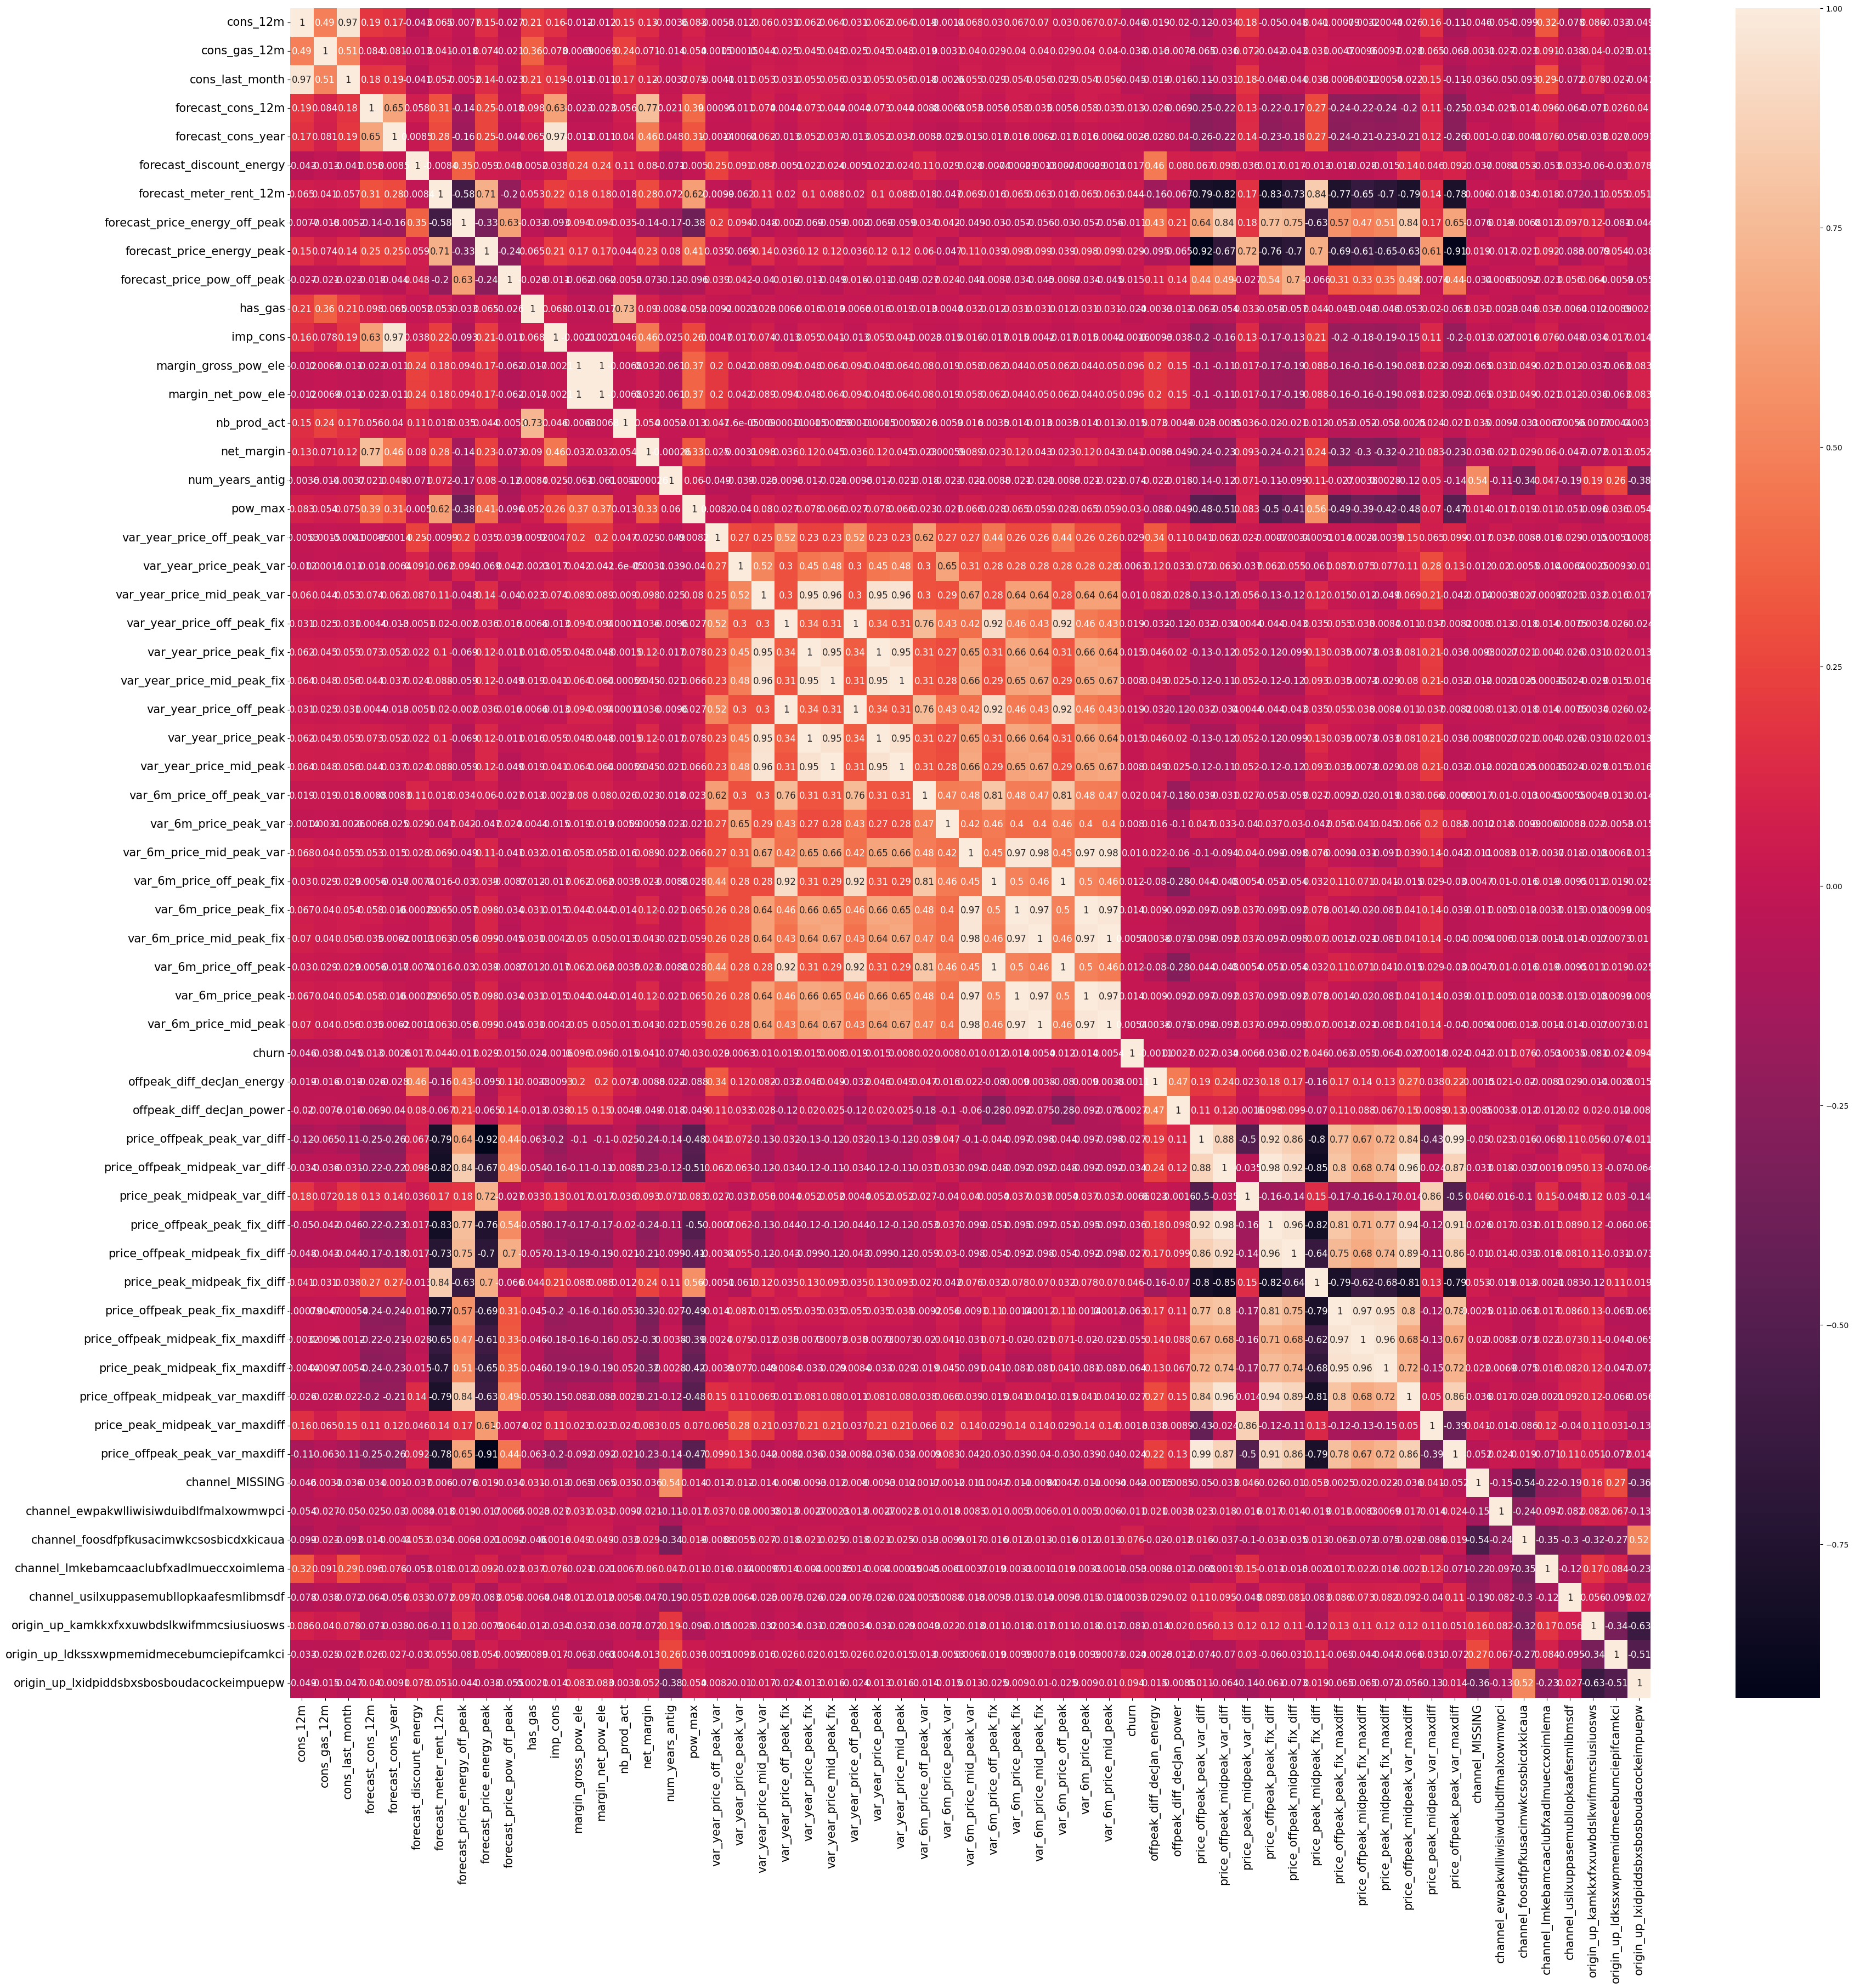

In [ ]:
# Calculate the correlation
correlation = df_main2.corr()

# Plot correlation
plt.figure(figsize=(40, 40))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# Delete columns that has a high correlation with the other variables
df_main.drop(['forecast_meter_rent_12m', 'forecast_price_energy_peak', 'price_peak_midpeak_fix_diff'], axis = 1, inplace = True)

In [ ]:
df_main.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,1,0,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,1,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0,1,0,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0,0,0,0,0,0,1,0,0,0


## **Handling Zero Values**

In [ ]:
# Calculate how many zero values are in each columns
df_mainColumns = df_main.columns.tolist()
for col in df_mainColumns:
  count = (df_main[col] == 0).sum()
  print('Count of zeros in Column', str(col), ":", count)

Count of zeros in Column id : 0
Count of zeros in Column channel_sales : 0
Count of zeros in Column cons_12m : 117
Count of zeros in Column cons_gas_12m : 11994
Count of zeros in Column cons_last_month : 4983
Count of zeros in Column date_activ : 0
Count of zeros in Column date_end : 0
Count of zeros in Column date_modif_prod : 0
Count of zeros in Column date_renewal : 0
Count of zeros in Column forecast_cons_12m : 306
Count of zeros in Column forecast_cons_year : 6148
Count of zeros in Column forecast_discount_energy : 14094
Count of zeros in Column forecast_meter_rent_12m : 725
Count of zeros in Column forecast_price_energy_off_peak : 22
Count of zeros in Column forecast_price_energy_peak : 7021
Count of zeros in Column forecast_price_pow_off_peak : 94
Count of zeros in Column has_gas : 0
Count of zeros in Column imp_cons : 6169
Count of zeros in Column margin_gross_pow_ele : 157
Count of zeros in Column margin_net_pow_ele : 157
Count of zeros in Column nb_prod_act : 0
Count of zeros

In [ ]:
# Delete columns with a significantly high number of zeros (> 10000 rows)
df_main.drop(['cons_gas_12m', 'forecast_discount_energy', 'var_6m_price_mid_peak_fix', 'var_6m_price_peak_fix'], axis = 1, inplace = True)